In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
num_mice = merged_df["Mouse ID"].nunique()
print(f"Number of unique mice IDs: {num_mice}")

Number of unique mice IDs: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get unique data by 'Mouse ID' and 'Timepoint'
duplicate_mouse_id = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print(f"array({duplicate_mouse_id}, dtype=object)")

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

array(['g989'], dtype=object)


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 

index_df = merged_df.set_index('Mouse ID')
index_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_df = merged_df.drop_duplicates(subset="Mouse ID", keep="first")
#cleaned_df.head()

cleaned_df = index_df.drop(['g989'])
cleaned_df.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.0,0,Capomulin,Female,9,22
f932,0,45.0,0,Ketapril,Male,15,29
g107,0,45.0,0,Ketapril,Female,2,29
a457,0,45.0,0,Ketapril,Female,11,30
c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice in the clean DataFrame.
#num_mice_cleaned = cleaned_df["Mouse ID"].nunique()
#print(f"Number of unique mice IDs after cleaning: {num_mice_cleaned}")

# Used .reset_index()
cleaned_df2 = cleaned_df.reset_index()

# Checking the number of mice in the clean DataFrame.
#print(cleaned_df2['Mouse ID'].value_counts())
print(len(cleaned_df2['Mouse ID'].unique()))

248


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = cleaned_df2.groupby(['Drug Regimen'])
summary_stats_mean = summary_stats['Tumor Volume (mm3)'].mean()
summary_stats_med = summary_stats['Tumor Volume (mm3)'].median()
summary_stats_var = summary_stats['Tumor Volume (mm3)'].var()
summary_stats_std = summary_stats['Tumor Volume (mm3)'].std()
summary_stats_sem = summary_stats['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({
                        "Mean Tumor Volume": summary_stats_mean,
                        "Median Tumor Volume" : summary_stats_med,
                        "umor Volume Variance" : summary_stats_var,
                        "Tumor Volume Std. Dev." : summary_stats_std,
                        "Tumor Volume Std. Err." : summary_stats_sem
                        })
summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,umor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_single_line = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_single_line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

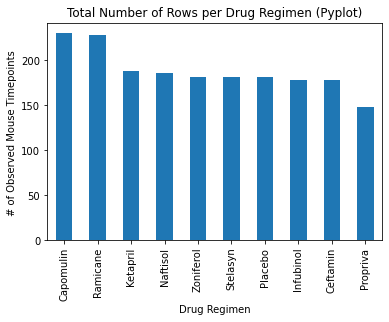

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#bar_plot_pandas = cleaned_df["Drug Regimen"].value_counts().plot(kind="bar", figsize=(10,5), color="darkblue", alpha=0.75)
#bar_plot_pandas.set_xlabel("Drug Regimen")
#bar_plot_pandas.set_ylabel("# of Observed Mouse Timepoints ")
#bar_plot_pandas.set_title("Total Number of Data Points for Each Drug Regimen (Pandas)")
#plt.show()

timepoint = cleaned_df2.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint.sort_values(ascending=False).plot.bar()
plt.title("Total Number of Rows per Drug Regimen (Pyplot)")
plt.ylabel("# of Observed Mouse Timepoints ")
plt.show()

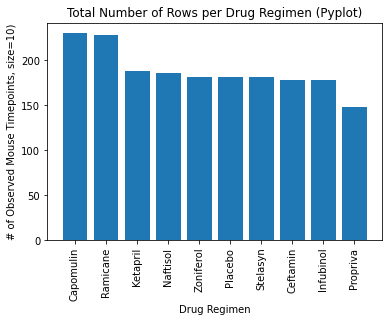

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(cleaned_df["Drug Regimen"].value_counts().index, cleaned_df["Drug Regimen"].value_counts().values)
plt.title("Total Number of Rows per Drug Regimen (Pyplot)")
plt.xlabel('Drug Regimen')
plt.ylabel("# of Observed Mouse Timepoints, size=10)")
plt.xticks(rotation='vertical')
plt.show()

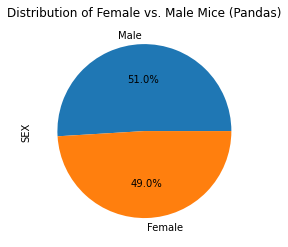

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution_pandas = cleaned_df2['Sex'].value_counts()
gender_distribution_pandas.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs. Male Mice (Pandas)')
plt.ylabel('SEX')
plt.show()

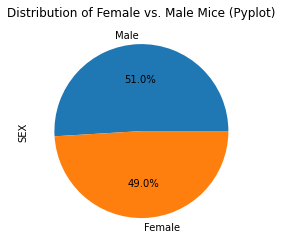

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plt.pie(cleaned_df["Sex"].value_counts(), labels=cleaned_df["Sex"].value_counts().index, autopct="%1.1f%%", startangle=360, colors=["blue", "darkorange"])
#plt.title("Distribution of Female vs Male Mice (Pyplot)")
#plt.axis("equal")
#plt.show()

gender_distribution_pyplot = cleaned_df2['Sex'].value_counts()
plt.pie(gender_distribution_pyplot.values, labels=gender_distribution_pyplot.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs. Male Mice (Pyplot)')
plt.ylabel('SEX')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = cleaned_df2.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoints_df = pd.DataFrame(max_timepoints)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#max_timepoints_df = pd.merge(cleaned_df2, max_timepoints_df, on=('Mouse ID', 'Timepoint'))

max_timepoints_df = pd.merge(cleaned_df2, max_timepoints_df, on=('Mouse ID', 'Timepoint'))


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for treatment in treatments:
    treatment_data = max_timepoints_df[max_timepoints_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volume_data.append(treatment_data)
    quartiles = treatment_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


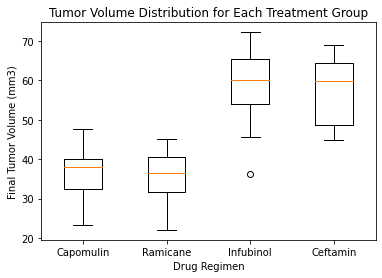

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', color='red'))
plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

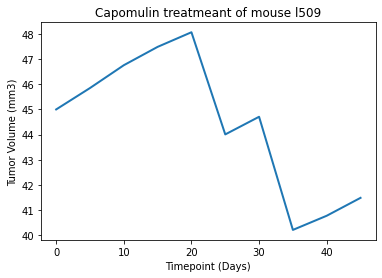

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = cleaned_df2.loc[cleaned_df2["Mouse ID"] == "l509",:]
line_df
# defined the x axis list 
x_axisTP = line_df["Timepoint"] 
# defined the y axis 
tumsiz = line_df["Tumor Volume (mm3)"] 

# created title
plt.title('Capomulin treatmeant of mouse l509') 
# the plot function plt.plot() with x and y values
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

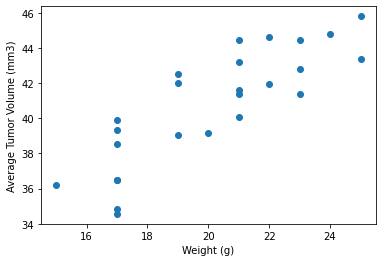

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
# use groupby() and mean() to create a dataframe
capavg = cap_df.groupby(['Mouse ID']).mean()

# created scatter plot of the x axis (weight) and the y axis (tumor size)
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


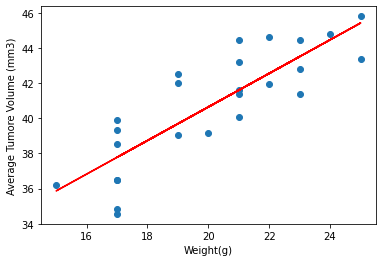

In [25]:
# ploting the regression line
# calculating linear regression values using st.linregress() function passing parameters from the capavg dataframe
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

# defined slope of regression line using the linregress results
# defined the y-intercept using the linregress results
slope = 0.9544396890241045
intercept = 21.552160532685015

# calculate the the linear line plot list of values
line = slope*(capavg['Weight (g)'])+intercept

# create the scatter plot like above
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])

# plot the linear regression line which is the averaged line of all the values in red
# i used the .format() function to create a label of the red line using the slope and intercept from above
plt.plot(capavg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
# included legend with the redline slope formula using plt.legend()

plt.savefig('linearregression')
plt.show()